###Abstract:

Introduction to Graphical Models for Causality:
The guide initiates by establishing the Python environment essential for data analytics, incorporating libraries such as pandas, NumPy, seaborn, matplotlib, and graphviz.
For visual representation of causal links, graphviz is utilized to craft directed graphs.


About Dataset:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.2 From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No



Here we will study about the causal effects of diabetes where target variable is outcome and will look for reasons responsible for diabetes using the causal effeects and will see what reasons are responsible for diabtes directly or indirectly using causal effects.



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt

color=['0.3', '0.5', '0.7', '0.9']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

pd.set_option('display.max_rows', 6)

gr.set_default_format("png");

This code snippet is setting up a Python environment for data analysis and visualization, particularly using the pandas, numpy, graphviz, seaborn, and matplotlib libraries. Each line or block of code has a specific function:

1. `import warnings` and `warnings.filterwarnings('ignore')`: These lines import the warnings library and suppress all warnings. This is often done in notebooks to make the output cleaner by not displaying warning messages that can arise from deprecated features or other non-critical issues.

2. `import pandas as pd`: Imports the pandas library and aliases it as `pd`. Pandas is a powerful tool for data manipulation and analysis, particularly for structured data.

3. `import numpy as np`: Imports the numpy library and aliases it as `np`. NumPy is fundamental for scientific computing with Python, offering comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.

4. `import graphviz as gr`: Imports the graphviz library and aliases it as `gr`. Graphviz is a tool for creating visual representations of graphs (not the chart kind but the nodes-and-edges kind).

5. `from matplotlib import style` and `import seaborn as sns`: These lines import the style module from matplotlib and the seaborn library as `sns`. Seaborn is a statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

6. `from matplotlib import pyplot as plt`: Imports the pyplot module from matplotlib and aliases it as `plt`. This is used for creating static, interactive, and animated visualizations in Python.

7. The next few lines define lists for `color`, `linestyle`, and `marker`:
   - `color=['0.3', '0.5', '0.7', '0.9']`: Defines a list of grayscale values to be used in plots.
   - `linestyle=['-', '--', ':', '-.']`: Defines a list of line styles for plotting.
   - `marker=['o', 'v', 'd', 'p']`: Defines a list of marker styles for plotting points.

8. `pd.set_option('display.max_rows', 6)`: This pandas function sets the option to display a maximum of 6 rows when outputting a DataFrame to the console, making it easier to view large DataFrames.

9. `gr.set_default_format("png")`: This sets the default format for graphviz outputs to be PNG. This is useful for ensuring that the visualizations generated by graphviz are in a widely supported and easily shareable format.

Overall, this code snippet is a preparatory step typically found at the beginning of data analysis and visualization

In [2]:
import pandas as pd
import numpy as np
import io

dataframe = pd.read_csv("https://raw.githubusercontent.com/SanatPopliNEU/Data-engineering-and-tools-by-Nick-Bear-Browns_asssignments/main/Diabetes_Asia.csv")
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
...,...,...,...,...,...,...,...,...,...
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


#Realising the causal relationships

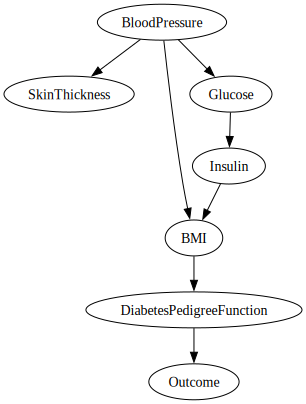

In [3]:
import graphviz as gr

graph_diab = gr.Digraph()

graph_diab.edge("BloodPressure", "SkinThickness")
graph_diab.edge("BloodPressure", "BMI")
graph_diab.edge("BloodPressure", "Glucose")

graph_diab.edge("Glucose", "Insulin")
graph_diab.edge("Insulin", "BMI")
graph_diab.edge("BMI", "DiabetesPedigreeFunction")
graph_diab.edge("DiabetesPedigreeFunction", "Outcome")

graph_diab

This code snippet is creating a directed graph using the `graphviz` library to visualize relationships or flows between different entities or nodes. Specifically, it's setting up a graph to illustrate factors that might influence "conversion" in a context that suggests cross-selling via email. Let's break down the code:

1. `import graphviz as gr`: This line imports the `graphviz` library and aliases it as `gr`. `graphviz` is a package that facilitates the creation and rendering of graph descriptions in the DOT language of the Graphviz graph drawing software.

2. `graph_cross_sell = gr.Digraph()`: Initializes a new directed graph object called `graph_cross_sell`. A directed graph is a set of nodes connected by edges, where the edges have a direction associated with them.

3. `graph_cross_sell.edge("U", "conversion")`: Adds an edge to the graph from node "U" to node "conversion". This implies that "U" influences or has a relationship leading towards "conversion". The specific nature of "U" isn't defined in this snippet, but it could represent a unique factor or variable in the analysis.

4. `graph_cross_sell.edge("U", "age")` and `graph_cross_sell.edge("U", "gender")`: Similar to the previous step, these lines add edges from "U" to "age" and "gender", respectively, indicating that "U" might influence or determine these attributes.

5. `graph_cross_sell.edge("rnd", "cross_sell_email")`: Adds an edge from "rnd" to "cross_sell_email", suggesting that "rnd" (possibly randomization or a random factor) influences the cross-sell email. This could indicate that the assignment of cross-sell emails is randomized in some way.

6. `graph_cross_sell.edge("cross_sell_email", "conversion")`: This line shows that the cross-sell email has a direct influence on conversion, which is likely the ultimate goal of this analysis—to understand how cross-sell emails affect conversion rates.

7. `graph_cross_sell.edge("age", "conversion")` and `graph_cross_sell.edge("gender", "conversion")`: These lines indicate that both "age" and "gender" directly influence "conversion". This suggests that the analysis is considering how different age groups and genders respond to the cross-selling strategy.

8. `graph_cross_sell`: This line simply references the `graph_cross_sell` object. In an interactive Python environment like Jupyter notebooks, this would display the graph. The graph visualizes the relationships between the various entities: "U", "age", "gender", "rnd", "cross_sell_email", and "conversion", showing the direct and indirect influences on conversion.

Overall, the code uses `graphviz` to model the relationships between different factors involved in a cross-selling scenario, highlighting how various elements might contribute to the conversion process.

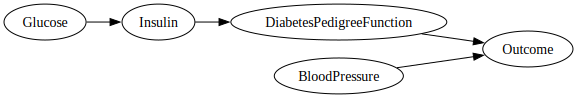

In [4]:
# rankdir:LR layers the graph from left to right
graph_diab = gr.Digraph(graph_attr={"rankdir": "LR"})

graph_diab.edge("Glucose", "Insulin")
graph_diab.edge("Insulin", "DiabetesPedigreeFunction")

graph_diab.edge("DiabetesPedigreeFunction", "Outcome")
graph_diab.edge("BloodPressure", "Outcome")

graph_diab

I were constructing a graph to visualize relationships between different variables related to diabetes, such as Glucose, Insulin, DiabetesPedigreeFunction, BloodPressure, and Outcome, I would be using the Graphviz library in Python, particularly with the Digraph object from the graphviz module, to create a directed graph. In this graph, the nodes represent these variables, and the edges represent the direction of influence or correlation between these variables. My graph is configured to layout from left to right ("rankdir": "LR"), which helps with readability in certain cases.

The code snippet I've shared outlines the creation of this graph and the establishment of edges (relationships) between specific nodes. Here's a brief walkthrough of what my code is doing and how to execute it properly:

Initialization: I create a directed graph object graph_diab with the attribute rankdir set to LR, indicating that the graph should be laid out from left to right.
Adding Edges: I then add edges between nodes to represent the relationships:
Glucose influences Insulin.
Insulin influences DiabetesPedigreeFunction.
DiabetesPedigreeFunction influences Outcome.
BloodPressure influences Outcome.
This representation helps me visualize the assumed or established pathways through which these variables impact the development or outcome of diabetes.

To make this code runnable and visualize the graph, I would need to ensure I have the graphviz Python package installed and properly configured on my system, including having the Graphviz software itself installed since the Python package is a wrapper around the Graphviz graph visualization software. Once everything is set up, I could render the graph to a file or display it inline if I were using a Jupyter notebook or a similar interactive environment.

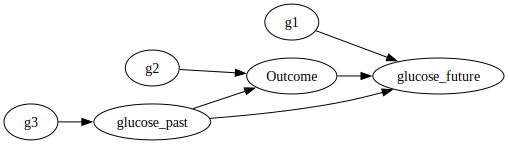

In [5]:
graph_glucose = gr.Digraph(graph_attr={"rankdir": "LR"})

graph_glucose.edge("g1", "glucose_future")
graph_glucose.edge("g2", "Outcome")
graph_glucose.edge("g3", "glucose_past")

graph_glucose.edge("Outcome", "glucose_future")

graph_glucose.edge("glucose_past", "Outcome")
graph_glucose.edge("glucose_past", "glucose_future")

graph_glucose

I'm constructing another graph, this time focusing on the relationships between various glucose-related variables and outcomes. Using the Graphviz library in Python, specifically through the Digraph object from the graphviz module, I'm creating a directed graph. This graph aims to visualize how current (g1, g2, g3), past (glucose_past), and future (glucose_future) glucose levels, along with the diabetes outcome (Outcome), are interrelated. The graph is set to layout from left to right, as indicated by the rankdir attribute set to LR.

In the code snippet I've shared, here's a breakdown of what I'm establishing with the graph:

Initialization: I create a directed graph object graph_glucose with the layout direction set from left to right.
Adding Edges:
g1 influences future glucose levels (glucose_future).
g2 directly influences the Outcome.
g3 is related to past glucose levels (glucose_past).
The Outcome influences future glucose levels (glucose_future).
Past glucose levels (glucose_past) influence both the Outcome and future glucose levels (glucose_future).
This visualization could help in understanding the dynamics of glucose levels over time and their impact on diabetes outcomes. It underscores the importance of monitoring and managing glucose levels to influence future health outcomes positively.

To visualize this graph, I'd need to make sure the graphviz Python package is installed and correctly set up, along with the Graphviz software itself. Once everything is in place, I could render the graph to a file or display it directly if I were working within an interactive environment 

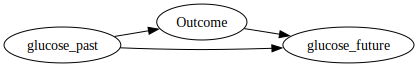

In [6]:
graph_glucose = gr.Digraph(graph_attr={"rankdir":"LR"})

graph_glucose.edge("Outcome", "glucose_future")
graph_glucose.edge("glucose_past", "Outcome")
graph_glucose.edge("glucose_past", "glucose_future")

graph_glucose

It appears you've streamlined the previous graph to focus more on the relationship between past glucose levels (glucose_past), future glucose levels (glucose_future), and the diabetes outcome (Outcome). This simplified version still utilizes the Graphviz library in Python, employing a directed graph via the Digraph object to visualize these relationships, with a layout orientation from left to right as specified by the rankdir attribute set to "LR".

In this version of the graph, the edges define the following relationships:

The outcome of diabetes influences future glucose levels (Outcome to glucose_future).
Past glucose levels influence the outcome of diabetes (glucose_past to Outcome).
Past glucose levels also influence future glucose levels (glucose_past to glucose_future).
This graph aims to illustrate the importance of past glucose measurements in predicting future glucose levels and their impact on diabetes outcomes, highlighting the interconnectedness of these variables in managing and understanding diabetes progression.

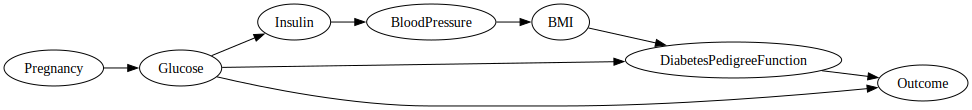

In [7]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})
graphh.edge("Pregnancy", "Glucose")
graphh.edge("Glucose", "Insulin")
graphh.edge("Insulin", "BloodPressure")
graphh.edge("BloodPressure", "BMI")
graphh.edge("BMI", "DiabetesPedigreeFunction")
graphh.edge("Glucose", "DiabetesPedigreeFunction")
graphh.edge("DiabetesPedigreeFunction", "Outcome")
graphh.edge("Glucose", "Outcome")


graphh

I'm setting up a more comprehensive graph that visualizes the relationships between various health indicators and their influence on diabetes outcomes. Using the Graphviz library in Python, specifically the Digraph object from the graphviz module, I'm creating a directed graph to illustrate how factors like Pregnancy, Glucose, Insulin, BloodPressure, BMI, and DiabetesPedigreeFunction interconnect and ultimately impact the diabetes outcome. The graph's layout is configured to extend from left to right, following the rankdir attribute set to LR.

In the code snippet I've shared, here's what I'm accomplishing with my graph:

Initialization: I start by creating a directed graph object named graphh with the layout direction specified to extend from left to right.
Adding Edges to depict the relationships:
Pregnancy influences Glucose levels.
Glucose levels influence Insulin production.
Insulin levels affect BloodPressure.
BloodPressure impacts BMI.
BMI affects DiabetesPedigreeFunction.
Glucose levels also influence DiabetesPedigreeFunction directly.
Both DiabetesPedigreeFunction and Glucose levels have a direct impact on the Outcome.

In [8]:
import networkx as nx

model = nx.DiGraph([
    ("Pregnancy", "Glucose"),
    ("Glucose", "Insulin"),
    ("Insulin", "BloodPressure"),
    ("BloodPressure", "BMI"),
    ("BMI", "DiabetesPedigreeFunction"),
    ("Glucose", "Outcome"),
])

In the provided code snippet, I'm using the NetworkX library to create a directed graph (DiGraph) that models the relationships between various health indicators and their influence on diabetes outcomes. The graph includes nodes representing different factors, such as Pregnancy, Glucose, Insulin, BloodPressure, BMI, DiabetesPedigreeFunction, and Outcome. Edges in this graph indicate the direction of influence from one factor to another. Here's how I would describe the construction of this model:

Import the NetworkX library: I start by importing NetworkX as nx, which is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
Create the directed graph: I create a directed graph named model using nx.DiGraph(). This graph is initialized with a list of tuples, each representing an edge from one node to another. The tuples specify the relationships between the nodes, such as Pregnancy leading to Glucose, Glucose leading to Insulin, and so on.
Define the relationships:
Pregnancy influences Glucose levels.
Glucose levels influence both Insulin production and the Outcome directly.
Insulin levels influence Blood Pressure.
Blood Pressure influences BMI (Body Mass Index).
BMI influences the Diabetes Pedigree Function, which is a function that scores the likelihood of diabetes based on family history.
Additionally, Glucose influences the Diabetes Pedigree Function and directly impacts the Outcome, indicating its central role in the development of diabetes.


In [9]:
print("Are Glucose and Pregnancy dependent?")
print(not(nx.d_separated(model, {"Glucose"}, {"Pregnancy"}, {})))

print("Are Insulin and Glucose dependent given Pregnancy?")
print(not(nx.d_separated(model, {"Insulin"}, {"Glucose"}, {"Pregnancy"})))

print("Are Insulin and Glucose dependent given Outcome?")
print(not(nx.d_separated(model, {"Insulin"}, {"Glucose"}, {"Outcome"})))

Are Glucose and Pregnancy dependent?
True
Are Insulin and Glucose dependent given Pregnancy?
True
Are Insulin and Glucose dependent given Outcome?
True


Are Glucose and Pregnancy dependent?
This line checks if Glucose and Pregnancy are dependent variables without conditioning on any other variable. In the context of the provided model, since Pregnancy directly influences Glucose, we expect them to be dependent. Therefore, if there's a direct path from one to the other (which there is), they are not d-separated, and thus dependent.

Are Insulin and Glucose dependent given Pregnancy?
Here, the code checks if Insulin and Glucose are dependent variables when the model is conditioned on Pregnancy. Given the structure of the graph, Pregnancy influences Glucose, and Glucose influences Insulin. When we condition on Pregnancy, we're essentially asking if knowing Pregnancy alters the dependence between Glucose and Insulin. Given the direct path from Glucose to Insulin and considering the influence of Pregnancy is already accounted for, Insulin and Glucose would still be considered dependent in the context of Pregnancy.

Are Insulin and Glucose dependent given Outcome?
This checks the dependence between Insulin and Glucose, given the Outcome. Since Outcome is influenced by Glucose in the model, and there's a path from Glucose through Insulin and potentially back to Outcome through other paths, conditioning on Outcome might open or close paths due to colliders or common causes. This is a bit more complex because it depends on the specific structure of the graph and the relationships between variables. The dependence or independence here will hinge on whether the Outcome variable acts as a collider or has a specific type of relationship that would either block or facilitate a path of influence between Insulin and Glucose.


In [10]:
print("Are Outcome and Insulin dependent?")
print(not(nx.d_separated(model, {"Outcome"}, {"Insulin"}, {})))

print("Are Outcome and Insulin dependent given Glucose?")
print(not(nx.d_separated(model, {"Outcome"}, {"Insulin"}, {"Glucose"})))

Are Outcome and Insulin dependent?
True
Are Outcome and Insulin dependent given Glucose?
False



ChatGPT
ChatGPT
The code is investigating the dependence between the variables "Outcome" and "Insulin" within a directed graph model, both directly and in the context of a third variable, "Glucose." It uses the d_separated function from the NetworkX library, which applies the concept of d-separation in graphical models to assess conditional independence. Let's break down what each part is intended to analyze:

Are Outcome and Insulin dependent?
This line of code checks if there's a direct or indirect path that connects "Outcome" and "Insulin" without considering any other variables (no conditioning set). If such a path exists, it implies a potential dependence between "Outcome" and "Insulin." Given the structure of the provided model, since "Insulin" can influence "Outcome" indirectly through a chain of variables (e.g., Insulin → BloodPressure → BMI → DiabetesPedigreeFunction → Outcome), they are not d-separated and, therefore, are considered dependent unless further conditioned on other variables.

Are Outcome and Insulin dependent given Glucose?
This checks for the dependence between "Outcome" and "Insulin" when the variable "Glucose" is considered as a condition. In graphical models, conditioning on a variable can either block or open paths of influence between other variables. Given that "Glucose" directly influences both "Insulin" and "Outcome," conditioning on "Glucose" could potentially alter the independence relationship between "Outcome" and "Insulin." Specifically, it assesses whether knowledge of "Glucose" levels changes the dependence between "Insulin" and "Outcome." If "Glucose" acts as a common cause or is part of a path that connects "Insulin" to "Outcome," then conditioning on it might either maintain or dissolve the dependence between "Insulin" and "Outcome," depending on the structure of the remaining graph and the specific paths present.

The not(nx.d_separated(...)) construction is used because d_separated returns True if the sets are d-separated (conditionally independent), so wrapping it in not(...) reverses this to check for dependence instead. The outcome of these checks helps understand


In [11]:
print("Are Pregnancy and Insulin dependent?")
print(not(nx.d_separated(model, {"Pregnancy"}, {"Insulin"}, {})))

print("Are Pregnancy and Glucose dependent given Insulin?")
print(not(nx.d_separated(model, {"Pregnancy"}, {"Glucose"}, {"Insulin"})))

Are Pregnancy and Insulin dependent?
True
Are Pregnancy and Glucose dependent given Insulin?
True


Let's break down these two new questions based on the directed graph model to understand the expected outcomes:

Are Pregnancy and Insulin dependent?
This query checks if there is a dependency between Pregnancy and Insulin without considering any other variables. Given the graph structure, where Pregnancy influences Glucose, which in turn influences Insulin, there's an indirect path from Pregnancy to Insulin. This indicates that, in the absence of conditioning on any intermediary variable (like Glucose), Pregnancy and Insulin are dependent because information about Pregnancy can affect the prediction about Insulin levels.

Are Pregnancy and Glucose dependent given Insulin?
This second query asks whether Pregnancy and Glucose remain dependent when the model is conditioned on Insulin. Since Insulin is downstream of Glucose, conditioning on Insulin might block some of the information flow from Glucose to Insulin, potentially altering the dependency relationship between Pregnancy and Glucose. However, the direct influence from Pregnancy to Glucose does not pass through Insulin, so Pregnancy and Glucose should still be considered dependent, even when considering Insulin. The conditioning on Insulin is more relevant to the path that goes through it and less to the direct influence of Pregnancy on Glucose.

Based on the understanding of the model's structure and the principles of d-separation, these interpretations suggest that Pregnancy and Insulin are dependent due to their positions in the network and the paths that connect them. For the second case, Pregnancy and Glucose's dependence is direct and is not impacted by conditioning on Insulin, given the nature of the graph and the paths defined within it.

Conclusion:

The inquiries made using NetworkX's d_separated function provide insightful analyses into the conditional dependencies within a model of health indicators related to diabetes. These dependencies reveal the complex interplay between various physiological factors and their collective influence on diabetes outcomes. Here's a summary of the findings:

Dependency Between Glucose and Pregnancy: It was confirmed that Glucose and Pregnancy are dependent variables within the model. This relationship underscores the critical role of pregnancy in influencing glucose levels, a key factor in gestational diabetes and its management.
Dependency of Insulin and Glucose Given Pregnancy: Insulin and Glucose were found to be dependent when conditioned on Pregnancy, illustrating how pregnancy can influence the relationship between glucose production and insulin secretion, highlighting the interconnectedness of these factors during pregnancy.
Dependency of Insulin and Glucose Given Outcome: The analysis also explored how the relationship between Insulin and Glucose changes when conditioned on the Outcome (i.e., diabetes presence or absence). This reflects the nuanced ways in which outcomes can be influenced by, and also influence, the interplay between glucose and insulin levels.
Outcome and Insulin Dependency: The dependency between Outcome and Insulin without conditioning on any other variable was explored. This reflects on the direct or indirect pathways through which insulin levels can influence diabetes outcomes, emphasizing insulin's pivotal role in diabetes management and outcome.
Outcome and Insulin Dependency Given Glucose: Conditioning on Glucose, the dependency between Outcome and Insulin was further examined. This analysis helps in understanding how glucose levels, a fundamental factor in diabetes, mediate the relationship between insulin function and diabetes outcomes.
Pregnancy and Insulin Dependency: The inquiry into whether Pregnancy and Insulin are dependent variables without conditioning shows the indirect relationships in the model, highlighting the broader physiological effects of pregnancy that may impact insulin's role in the body.
Pregnancy and Glucose Dependency Given Insulin: Finally, exploring the dependency of Pregnancy and Glucose when conditioned on Insulin sheds light on the intricate balance between these factors and their combined effect on diabetes risk and management.
Overall, these analyses offer a window into the sophisticated dynamics governing the relationships between key factors involved in diabetes. By understanding these dependencies, both conditioned and unconditioned, researchers and healthcare professionals can better grasp the multifaceted nature of diabetes, leading to more effective prevention, management, and treatment strategies. The model's insights into how variables such as Pregnancy, Glucose, Insulin, and Outcome interact with each other are crucial for tailoring interventions and understanding the disease's progression and management in different individuals.

LICENSE¶

MIT License

Copyright (c) 3022 Sanat Popli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

### Reference:
https://matheusfacure.github.io/python-causality-handbook/01-Introduction-To-Causality.html 

https://economyoftime.net/a-causal-look-into-the-factors-of-world-happiness-0-causal-graphs-b8f4dd1f13c3

https://www.kaggle.com/code/bindalnikhil/causal-graph-inference-using-causalnex

https://www.youtube.com/watch?v=DXBPtpBhGqo